# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

Dataset here : https://www.batadal.net/data.html You will need Training Dataset 1, Training Dataset 1 and Test Dataset.

## Group Number : 27

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Run the code fragment for each task separately

## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Figure 1: types of signals in dataset


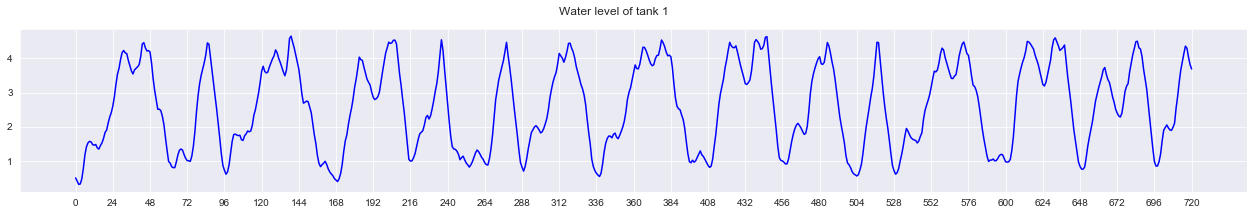

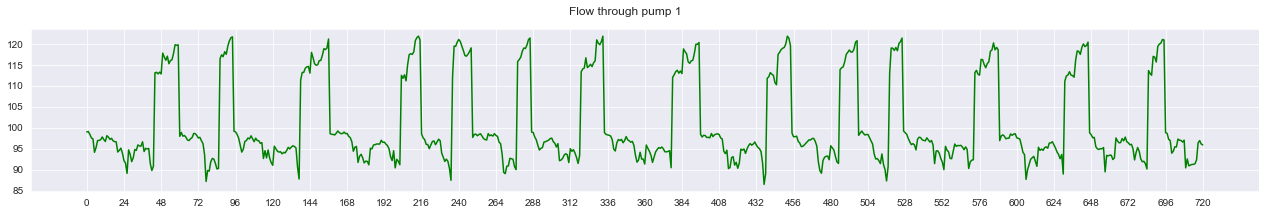

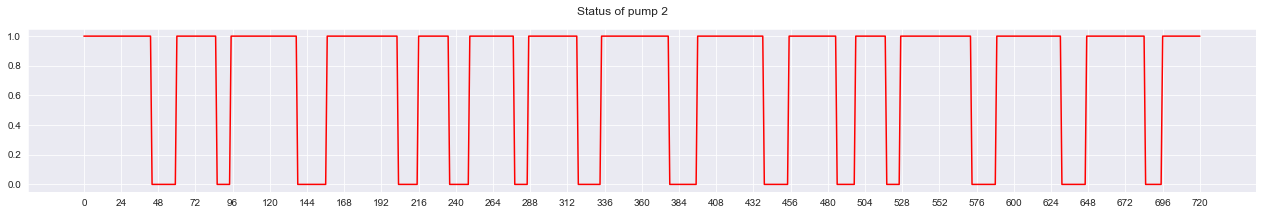

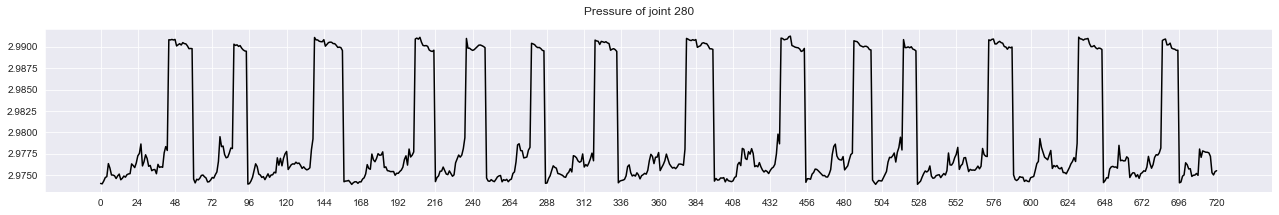


Figure 2: correlation between signals


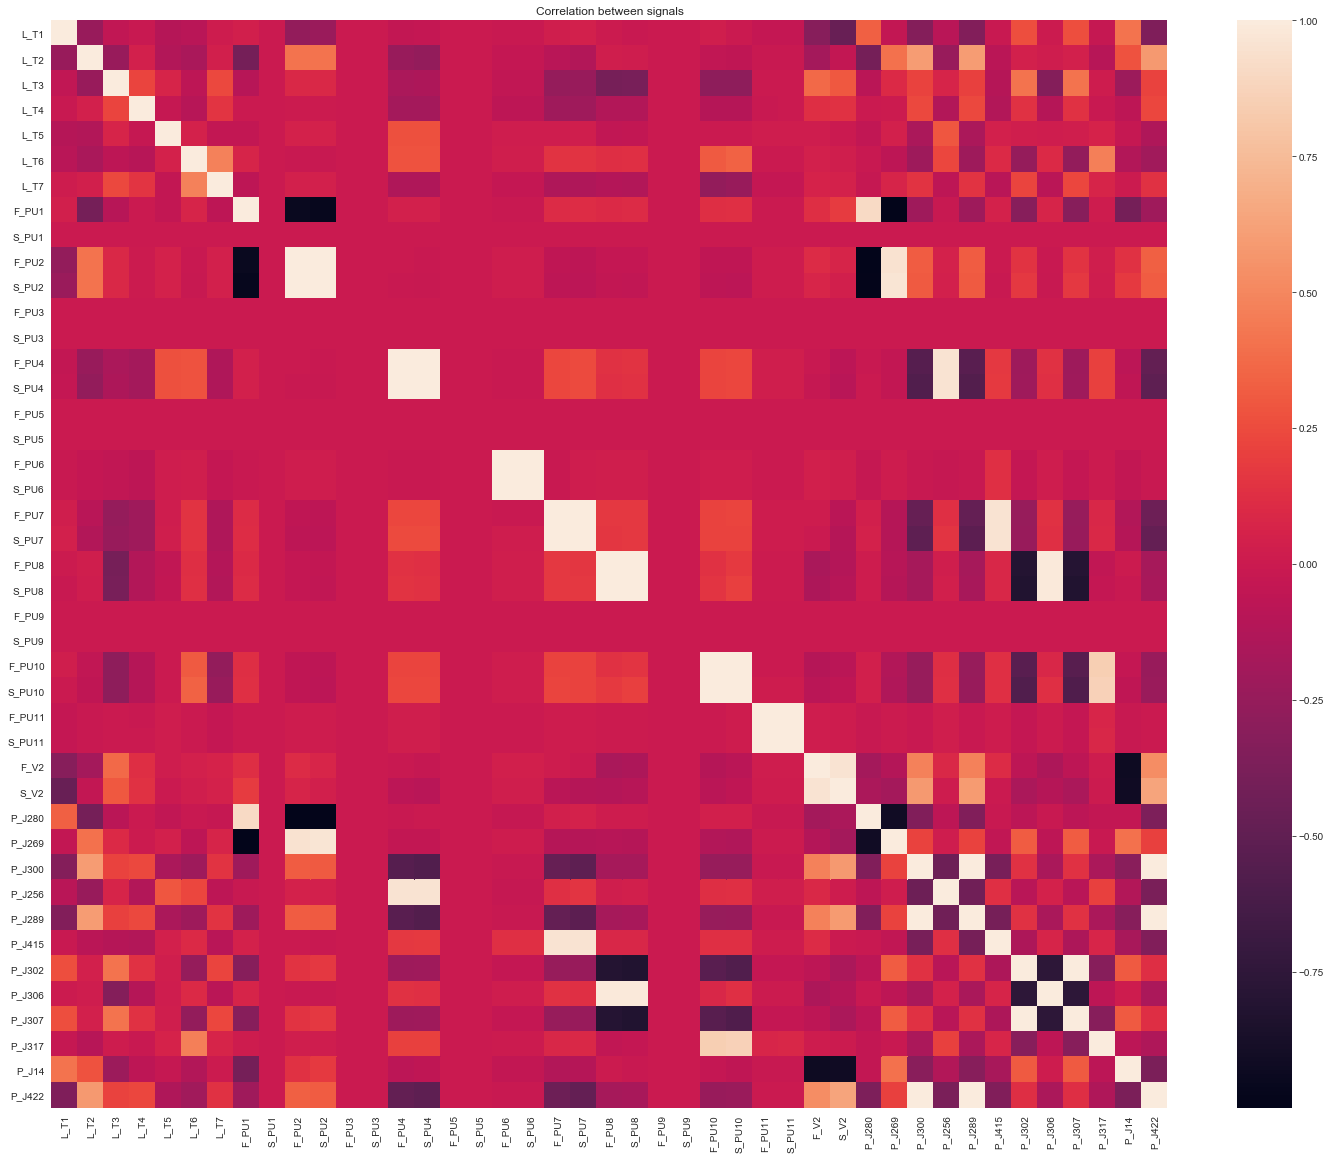


Figure 3: perfectly correlated signals


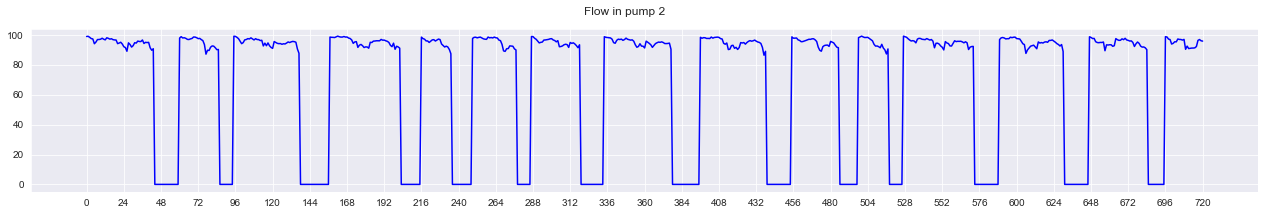

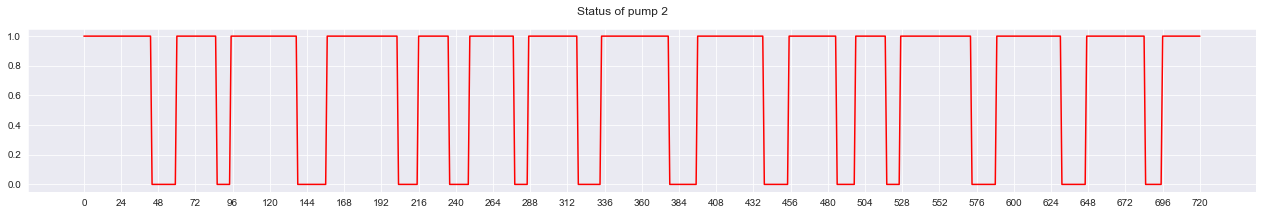


Figure 4: perfectly negatively correlated signals


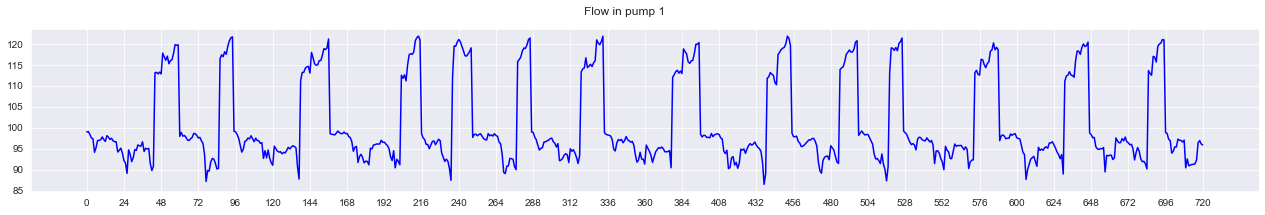

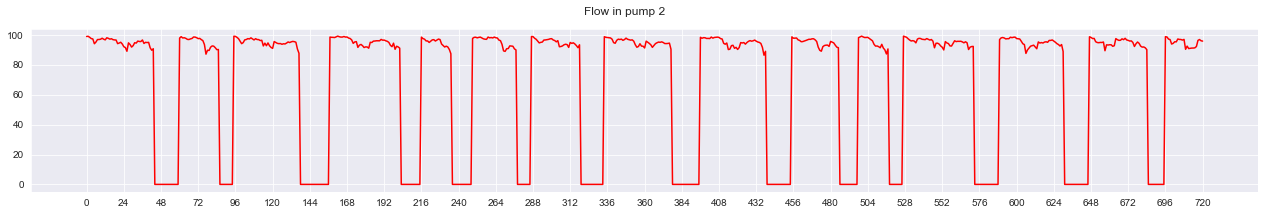


Figure 5: prediction of the water tank signals


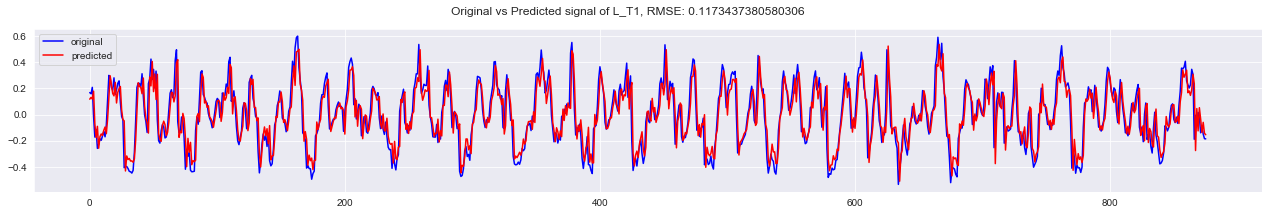

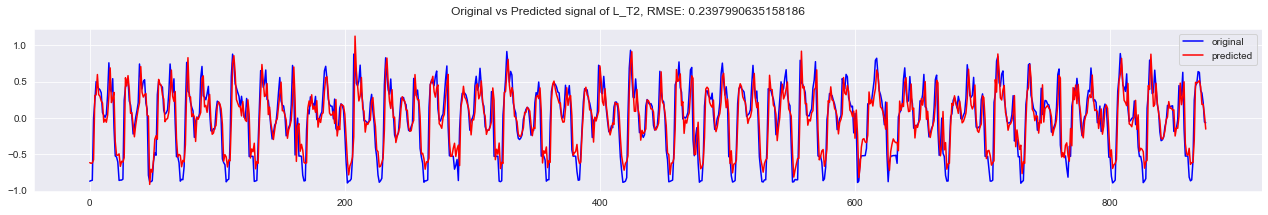

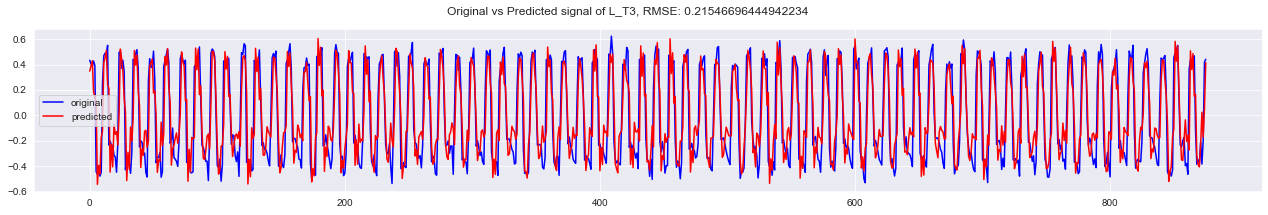

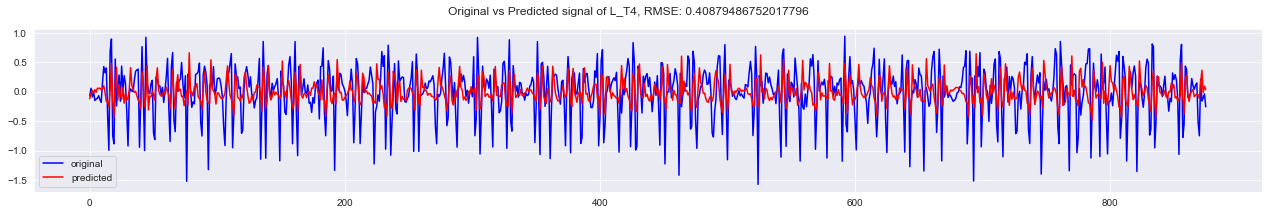

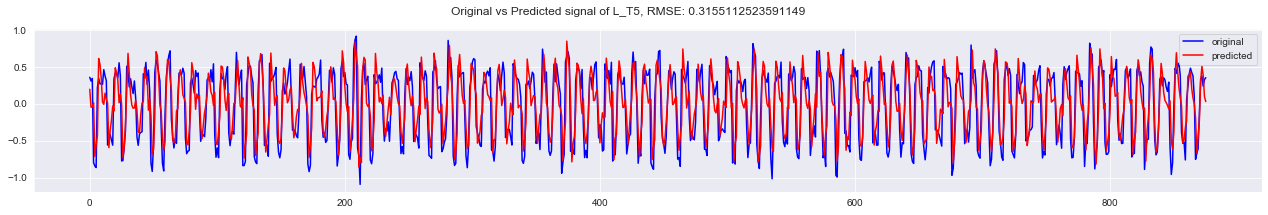

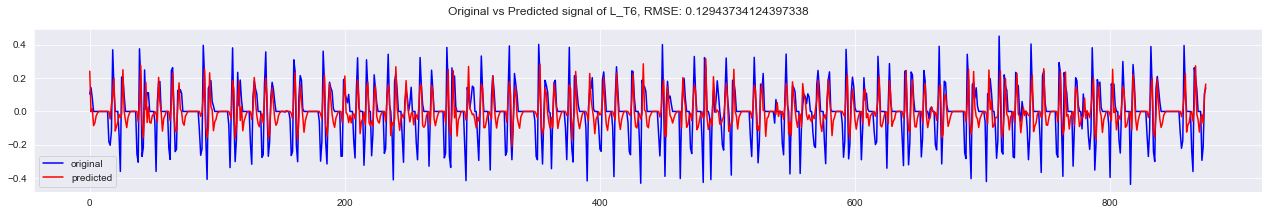

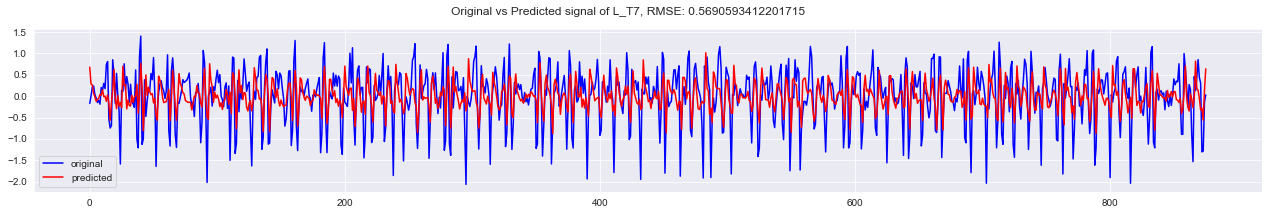

Average RMSE: 0.2850589383381013


In [23]:
%reset -f
%load_ext autoreload
%autoreload 2

import familiarization as fam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = fam.load_data("data/BATADAL_dataset03.csv")
tdata = fam.pre_process(data)

# Plot sample signals
print("\nFigure 1: types of signals in dataset")
fam.plot_signal(tdata,"L_T1",0,720,"Water level of tank 1","blue")
fam.plot_signal(tdata,"F_PU1",0,720,"Flow through pump 1","green")
fam.plot_signal(tdata,"S_PU2",0,720,"Status of pump 2","red")
fam.plot_signal(tdata,"P_J280",0,720,"Pressure of joint 280","black")

# Determine and plot correlation between signals
print("\nFigure 2: correlation between signals")
fam.plot_correlation(tdata)

# Example of almost perfectly correlated signals
print("\nFigure 3: perfectly correlated signals")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","blue")
fam.plot_signal(data,"S_PU2",0,720,"Status of pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 4: perfectly negatively correlated signals")
fam.plot_signal(data,"F_PU1",0,720,"Flow in pump 1","blue")
fam.plot_signal(data,"F_PU2",0,720,"Flow in pump 2","red")

# Example of almost perfectly negatively correlated signals
print("\nFigure 5: prediction of the water tank signals")
signals = ["L_T1", "L_T2", "L_T3", "L_T4", "L_T5", "L_T6", "L_T7"]
rmse = list()
for signal in signals:
    rmse.append(fam.predict_signal(data,signal,0.9))
print("Average RMSE:",np.mean(rmse))

### 1b. Answers to the three questions

SCADA is a system/network of software and hardware components in which the data from sensors and other industrial components like pumps and valves can be monitored and controlled from a centralized computer. These kind of systems are vunerable to cyber-physical attacks.

The BATADAL dataset is a representation of (measured) data over time from tanks (7), pumps (11), valves (4, of which 1 actionable), and other hydraulic components like joints (12 in total) from the C-Town water distribution system. The information that is embedded in the dataset contains the water level in each tank, the flow through each pump and valve and their status at that time (0 for off, 1 for on), and the pressure in the joints. Each record additionally stored the date and hour, and the attack flag status (0 for no attack, 1 for attack, and -999 as unknown(?)).

##### Signal types
The signals that can be extracted from the dataset thus are the levels in the water tank, the flow through the pumps and valves, the status of each pump/valve over time, and the pressure in the joints. In Figure 1 all four signals can be seen over about a month in time for illustration purpose only. We can clearly see that the patterns for all signals are between boundaries, and look like to be repeating/cyclic in some form. We also see that the status indeed switches from off and on, although the value is only measured once every hour.

##### Correlation
To see if the signals are correlated we can determine the correlation between any columns in the dataset, and create a heatmap to easily visualize the correlation (see Figure 2). We see that most signals have a no correlation (value +-0), while there exist some perfect correlated signals (excluding the signals with theirselves) and perfect negatively correlated signals (signals move in opposite direction). For example the correlation of the flow of pump 2 (F_PU2) with the status of pump 2 (S_PU2) is 0.998614, meaning they are perfectly correlated. This is ofcourse not strange since if the pump is enabled (status code 1) the flow in the pump is also enabled, see Figure 3 for pattern comparison of a part of the signals. If we look at other signals (that are not from the same component), we see that for instance the flow in pump 1 is almost perfectly correlated with the pressure in joint 280, with a correlation value of 0.907052. This probably indicates that joint 280 is the connection leaving pump 2, while it is connected to something that is not flowing at the same speed as pump 2. We also see (Figure 4) that for instance the signals from F_PU1 and F_PU2 are perfectly negatively correlated with a value of -0.949012, meaning that when the signal from one of the two is going up or down, the other one is moving in the opposite direction. 

From the signals we can easily see that they look to be cyclic. From the flow in pump 2 signals in Figure 3 we see that in 24 hours (although it is measured ones per hour) the frequency of the signal repeating is about 14 times. The cycle is not a perfect sinusoidal, but the similarity between them is very well visible.

###### Prediction
For the prediction of the signals we use an AutoRegressive model that is trained by a training set, and for the prediction it takes previous observation(s) of the time series into account. The lag has been chosen to be closer to zero and not bigger since the more recent previous observations should be more important than extra previous observations (adding more lag decreases the influence of all other observations). In Figure 5 the original and predicted signals of the water tanks can be seen, including their RMSE. We can see that for all signals did well, although for signals L_T4, L_T5 and L_T7 the prediction is less accurate than for the others. If we compare signals L_T1 and L_T6, at first sight L_T1 looks like to be predicted better by a lot. If we look at the RMSE the difference is just a fraction.

If instead of the water levels of the tanks we try to predict the signals of the flows of the 11 pumps, the result is very different. The average RMSE is increased to 7.59, and the predicted signal does not follow the curves of the original signal at all for most signals.

Predicting the next value in a series thus differs if the signal is applicable for it. From what we've seen is that the water levels in the tanks are very fitting for prediction, while the flow in the pumps are not.


## 2. LOF task – 1/2 A4 – Individual - Lennart

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual - Joost

### 3a. Plot PCA residuals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


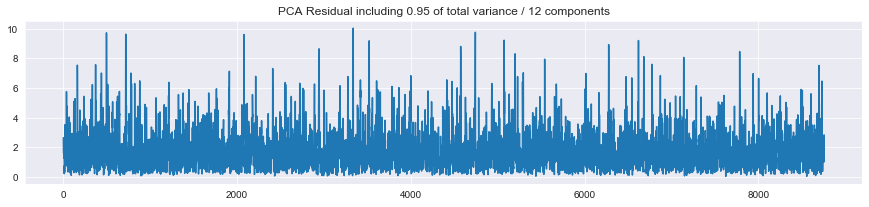

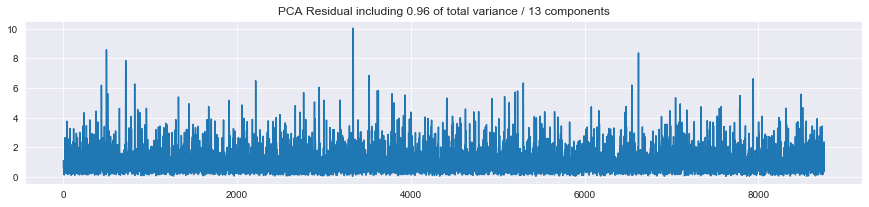

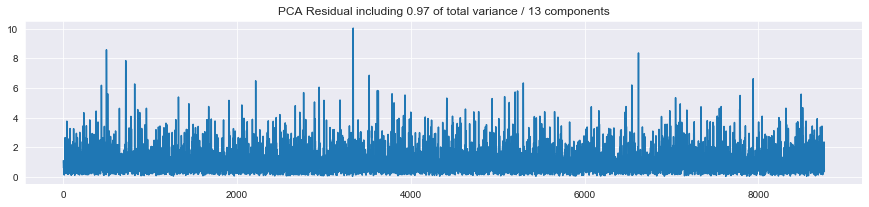

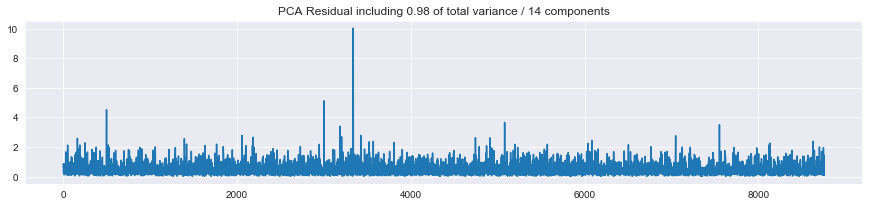

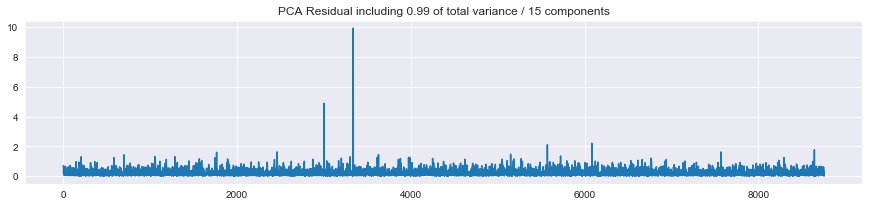

Figure 3.1: Residual plots for variance levels 0.95 to 0.99


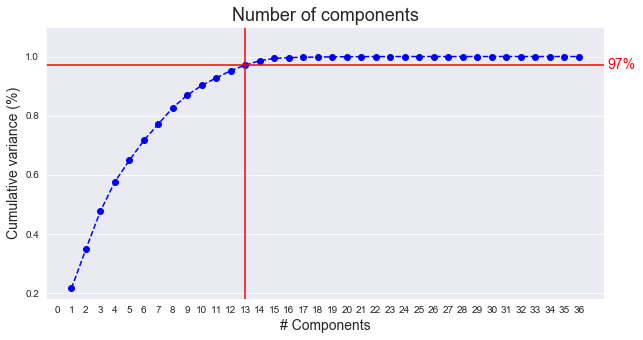

Figure 3.2: Number of components at variance level 0.97


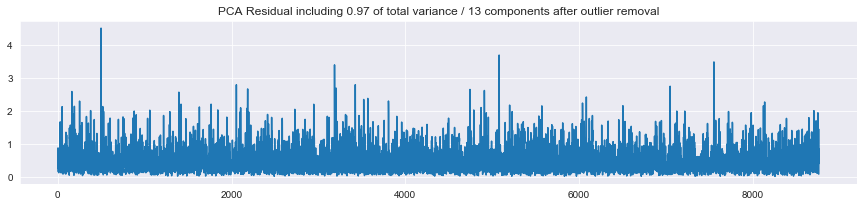

Figure 3.3: Residual plot for variance level 0.97 after anomaly removal


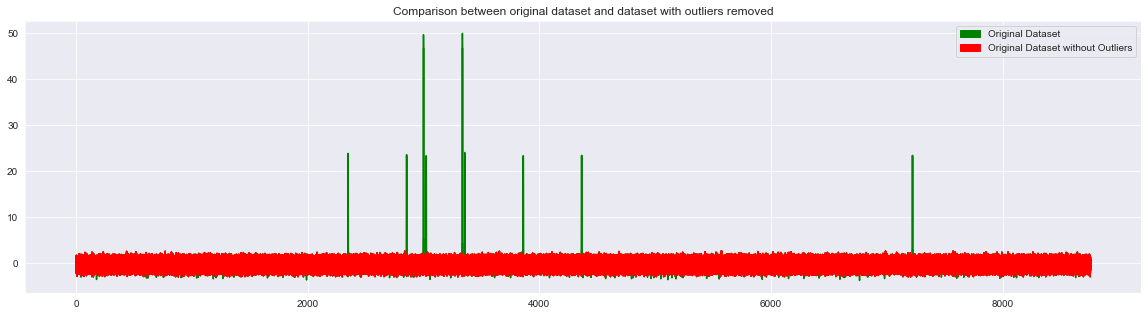

Figure 3.4: Comparison of original dataset and after anomaly removal


In [21]:
%reset -f
%load_ext autoreload
%autoreload 2

import pca_helper as pca_helper
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.decomposition import PCA

data = pca_helper.load_data("data/BATADAL_dataset03.csv")
data2 = pca_helper.load_data("data/BATADAL_dataset04.csv")
tdata, labels = pca_helper.pre_process(data)
tdata2, labels2 = pca_helper.pre_process(data2)

# Create residual plots
variances = [0.95, 0.96, 0.97, 0.98, 0.99]
pca = list()
x = list()
components = list()
x_fitted = list()
error = list()
mean_data = list()
std_data = list()

for var in variances:
    pca.append(PCA(n_components=var, random_state=33))

for p in pca:
    index = pca.index(p)
    x.append(p.fit_transform(tdata))
    components.append(p.components_)
    
    x_fitted.append(np.matmul(x[index],components[index]))
    
    error.append(np.sum((tdata-x_fitted[index])**2,axis=1))
    
    plt.subplots(figsize=(15,3))
    plt.title('PCA Residual including '+str(variances[index])+' of total variance / '+str(len(components[index]))+' components')
    plt.plot(error[index])
    plt.show()
print("Figure 3.1: Residual plots for variance levels 0.95 to 0.99")

# Plot the number of components and its value to the total variance
n_features = len(tdata.columns)
pca_all = PCA(n_components=n_features, random_state=33)
pca_all.fit_transform(tdata)

pca_helper.number_of_components_plot(pca_all, len(tdata.columns), 0.97);
print("Figure 3.2: Number of components at variance level 0.97")

# Detect and remove outliers from dataset
mean = list()
std = list()
outliers = set()
columns = tdata.columns

for col in columns:
    mean.append(np.mean(tdata[col]))
    std.append(np.std(tdata[col]))
    
for i in range(len(tdata)):
    row = tdata.loc[i]
    
    for j in range(len(columns)):
        if row[columns[j]] < mean[j]-3*std[j] or row[columns[j]] > mean[j]+3*std[j]:
            outliers.add(i)

tdata_without_outliers = tdata.copy()
tdata_without_outliers.drop(outliers, inplace=True)

# Create new residual plots, without the anomalies
pca_new = PCA(n_components=0.97, random_state=33)
x_new = pca_new.fit_transform(tdata_without_outliers)
components_new = pca_new.components_

x_fitted_new = np.matmul(x_new,components_new)

error_new = np.sum((tdata_without_outliers-x_fitted_new)**2,axis=1)

plt.subplots(figsize=(15,3))
plt.title('PCA Residual including 0.97 of total variance / 13 components after outlier removal')
plt.plot(error_new)
plt.show()
print("Figure 3.3: Residual plot for variance level 0.97 after anomaly removal")

# Create plot comparison of original dataset vs the removal of outliers
f, ax = plt.subplots(figsize=(20,5))
ax.plot(tdata, color='green');
ax.plot(tdata_without_outliers, color='red');

label_original = matplotlib.patches.Patch(color='green', label='Original Dataset')
label_without_outliers = matplotlib.patches.Patch(color='red', label='Original Dataset without Outliers')
plt.legend(loc='upper right', handles=[label_original, label_without_outliers]);
plt.title("Comparison between original dataset and dataset with outliers removed");
plt.show()
print("Figure 3.4: Comparison of original dataset and after anomaly removal")

### 3b. Analysis and answers to the questions

Before we can apply PCA we must normalize the dataset (training 1). Since PCA is affected by scale the features must be scaled before it can be applied to it. To obtain optimal performance in machine learning algorithms it requires the features of the dataset to be unit scale, with zero mean and variance one. After applying the zscore to the dataset there are some columns/features that contains NaN values for mean and/or variance. These columns are dropped from the dataset because they do not satisfy the requirement. The remaining 36 features can be used for PCA decomposition. For PCA to work with anomaly detection it needs to drop some (more) features/components because otherwise it has a difficult time differentiating anomalies from normal cases. To determine the number of components to use for PCA, we can define a threshold. The cumulative variance of the principal components (n) determines the number of components for this threshold. To be able to detect the normal behaviour of the series, enough variance must still be present. However, too much variance can mean that the model has learned about the anomalies as well. 

In Figure 3.1 the PCA residuals of all signals with the corresponding number of components can be seen. The residual is the difference between the original data and the data mapped onto the first n (components) principal axes. We can clearly see there are at least two very high peaks (errors) present in all residual plots. It looks like that 99% removes too much anomalies, while for lower than 97% it is hard to distinquish what is an anomaly and what not. We therefore choose to include 97% variance, containing only 13 components. In Figure 3.2 the number of components is displayed against the cumulative variance. The first 15 principal axes add relatively much value to the variance and the last 21 add almost nothing to the variance and are therefore considered to be of less use.

The next step is to remove anomalies from the dataset. To remove the outliers we have to set a threshold. We assume a normal distribution, and outliers can be removed when the value in any column for that instance is bigger or smaller than the maximal aloud interval apart from the mean. The interval for normal behaviour samples is estimated to be mean plus/minus three times the standard deviation for each column in the original dataset (after processing). This interval is chosen since it represents 99.7% of all data, which is near the same number as in the datasets itself (only 7 attacks adopted in the the other datasets). For this interval there are 85 anomalies detected and removed. In Figure 3.3 the adjusted residual plot of the adjusted dataset (without anomalies) can be seen. 

In the training set some large anomalies are present, as can be seen in Figure 3.4. The data in the original dataset is compared to the data of the dataset without the anomalies. All signals now behave in somewhat the same boundaries. The model should be trained after these anomalies are removed as much as possible, otherwise the model also learnes information about the anomalies thinking it is normal data. In some situations it may occur that the values of the sensors in the SCADA system do not follow the correct patterns due to for instance an operator that is evaluating a problem, a broken sensor, or a software bug. 

The kinds of anomalies that can be detected with PCA are point anomalies and collective anomalies. Point anomalies can be detected by the means of a single outlier, as done in the code above. Collective anomalies are a subset of anomalies that together deviate differently from the other data points, without the points being anomalies on their own. This can be detected for instance by signals that are behaving in the opposite direction.

## 4. ARMA task – 1/2 A4 - Individual - Joost

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual - Lennart

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.